In [73]:
import matplotlib.pyplot as plt
import numpy as np

In [74]:
OUTPUT_FILE = "rhopsi.png"

In [75]:
def ls_rho(x):
    return 0.5*x**2
def ls_psi(x):
    return x

def lad_rho(x):
    return np.abs(x)
def lad_psi(x):
    return np.sign(x)

def huber_rho(x, k = 1.345):
    return np.where(np.abs(x) < k, 0.5*x**2, k*np.abs(x)-0.5*k**2)
def huber_psi(x, k = 1.345):
    return np.where(np.abs(x) < k, x, k*np.sign(x))

def tukey_rho(x, k = 4.685):
    return np.where(np.abs(x) < k, (k**2/6)*(1-(1-(x/k)**2)**3), (k**2/6))
def tukey_psi(x, k = 4.685):
    return np.where(np.abs(x) < k, x*(1-(x/k)**2)**2, 0)

def andrews_rho(x, c = 1.339):
    return np.where(np.abs(x) < c*np.pi, c*(1-np.cos(x/c)), 2*c)
def andrews_psi(x, c = 1.339):
    return np.where(np.abs(x) < c*np.pi, np.sin(x/c), 0)

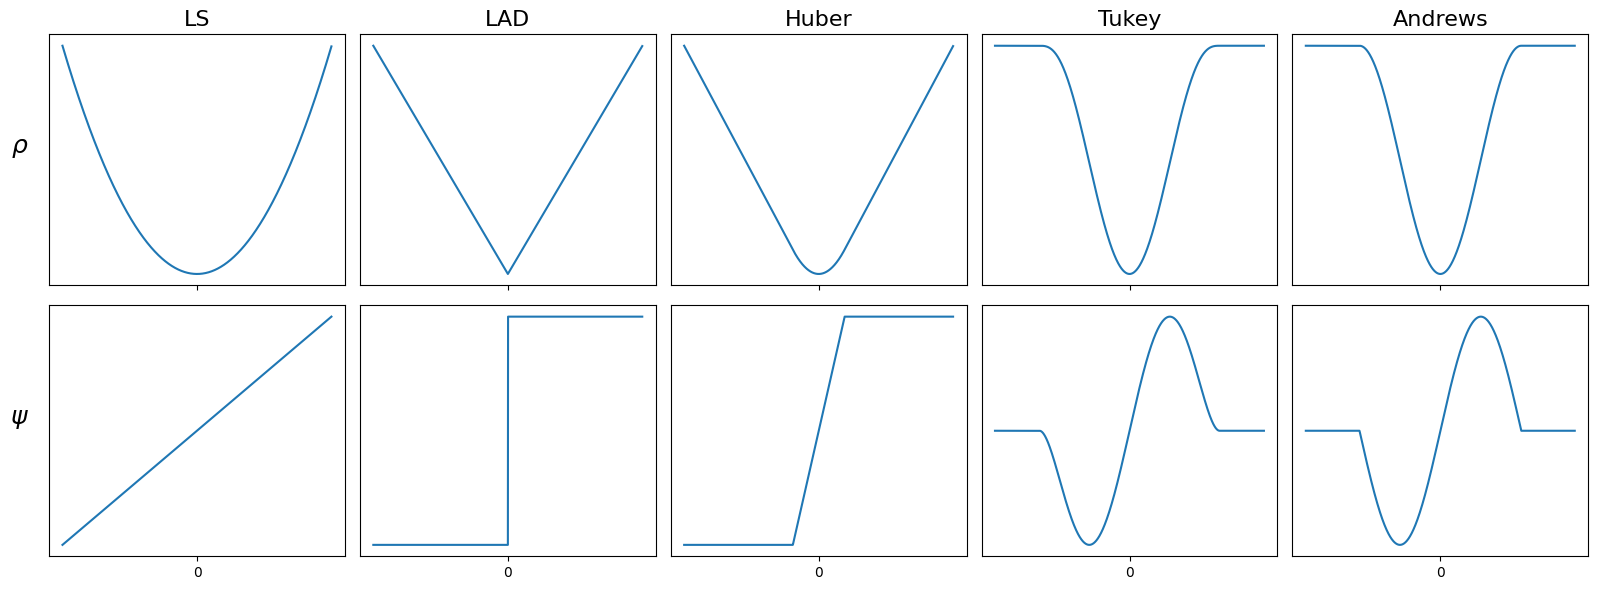

In [79]:
functions = np.array([
    [ls_rho, lad_rho, huber_rho, tukey_rho, andrews_rho],
    [ls_psi, lad_psi, huber_psi, tukey_psi, andrews_psi]
])

x_points = np.arange(-7, 7, 0.01)

fig, axs = plt.subplots(2, 5, figsize = (16, 6))
for i, function in enumerate(functions):
    letter = [r"$\rho$", r"$\psi$"][i]
    for j, M in enumerate(function):
        ax = axs[i, j]
        name = ["LS", "LAD", "Huber", "Tukey", "Andrews"][j]
        ax.plot(x_points, M(x_points))
        if i == 1:
            ax.set_xticks([0])
        else:
            ax.set_xticks([0], [""])
        ax.set_yticks([])
        if i == 0:
            ax.set_title(name, fontsize = 16)
        if j == 0:
            ax.set_ylabel(letter, rotation = 0, fontsize = 18)
            ax.yaxis.set_label_coords(-0.1, 0.5)

plt.tight_layout()
plt.savefig(OUTPUT_FILE, dpi = 200)
plt.show()